# Supervised Learning
In Machine Learning, Supervised learning is the task of learning a function that maps an input to an output based on sample input-output pairs.

One of its applications is to predict numeric outcomes; we train an alogorithm to learn how to map input(s) to a numeric outcome value.

# Numeric Prediction
In this activity We will become familiar with several models for **predicting numeric outcomes**.

In [2]:
# make sure to upload the dataset to your colab folder before proceeding (see instructions in 1_GettingStarted)
#loading the 50_startups datasets as a panda dataframe
import pandas as pd
dataset = pd.read_csv('50_Startups.csv')

In [5]:
# if you are using the file from your google drive
import pandas as pd
from google.colab import drive
dataset = pd.read_csv('/content/drive/MyDrive/MIS/50_Startups.csv')

In [6]:
#take a look a descriptive statistics
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Visually exploring our dataset
We will use the seaborn library to create some visualizations

<ipython-input-7-4e5bcfee6aa0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset['R&D Spend']) #histogram for R&D spending


<Axes: xlabel='R&D Spend', ylabel='Density'>

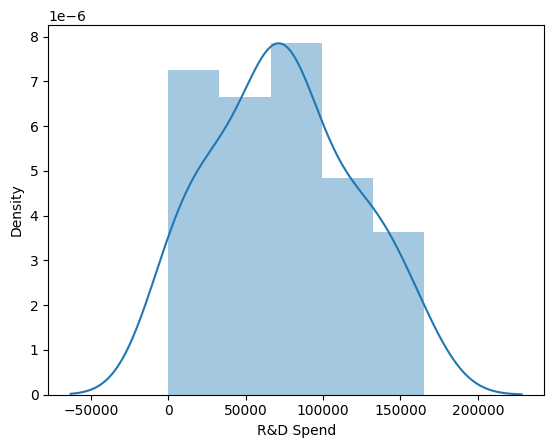

In [7]:
#visually exploring the dataset
#the next few cells demonstrate several graphs that can be useful to visually explore your data
import seaborn as sb
sb.distplot(dataset['R&D Spend']) #histogram for R&D spending

<ipython-input-8-3602069219db>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset['Administration']) #histogram for Administration spending
<ipython-input-8-3602069219db>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset['Marketing Spend'])  #histogram for Marketing spending


<Axes: xlabel='Marketing Spend', ylabel='Density'>

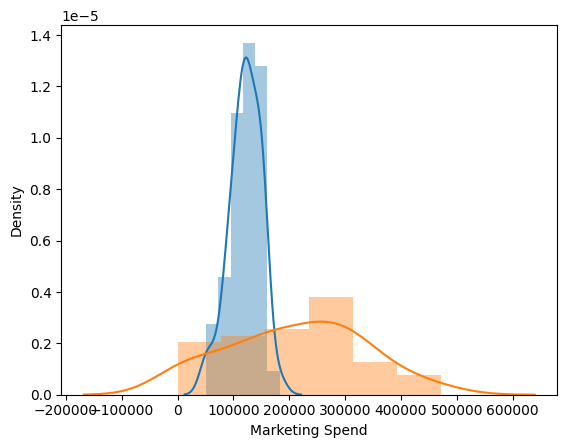

In [8]:
sb.distplot(dataset['Administration']) #histogram for Administration spending
sb.distplot(dataset['Marketing Spend'])  #histogram for Marketing spending

<Axes: xlabel='State', ylabel='R&D Spend'>

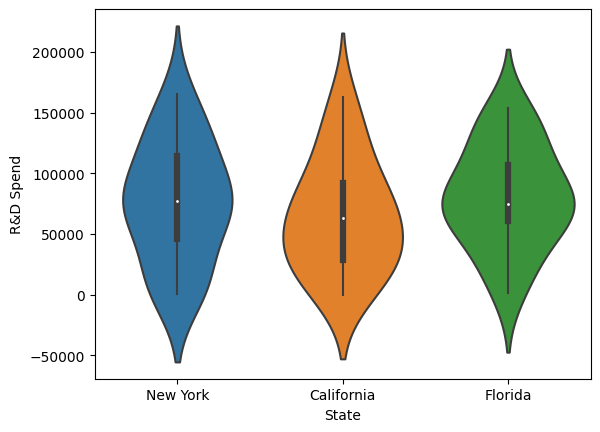

In [9]:
#comparing R&D spending across states using violin plots
sb.violinplot(x="State",y="R&D Spend", data=dataset)

<Axes: xlabel='State', ylabel='R&D Spend'>

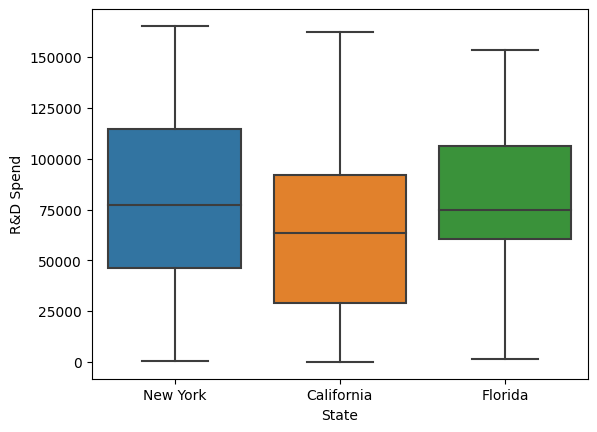

In [10]:
#comparing R&D spending across states using box
sb.boxplot(x="State",y="R&D Spend", data=dataset)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

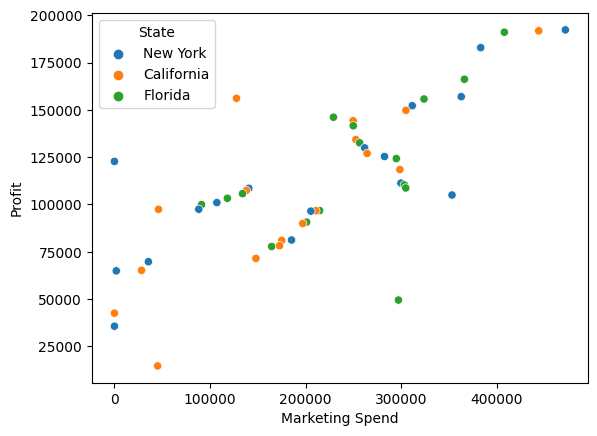

In [11]:
#scatter plot of Profits vs. Marketing Spending, colored by State
sb.scatterplot(x="Marketing Spend",y="Profit",hue="State", data=dataset)


In [12]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
##preparing the data for model training
#dataset.iloc[0,3] #points to a specific [row,column] ; index starts at 0
#defining input and outcome variables
y = dataset[['Profit']]  #profit
#X = dataset.drop(labels=['Profit','State'], axis=1) #other variables
X = dataset.drop('Profit',axis=1) #other variables

In [14]:
#before encoding the State variable
X.head(3)

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida


In [15]:
#The state variable is categorical,
#we use binary encoding to create binary variable for each level of the State variable
pd.get_dummies(X['State']).head(3)

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0


In [16]:
#add the binary encoded State variables to our X variable
X=pd.concat([X,pd.get_dummies(X['State'])],axis=1)
# drop the State column, since we now have the binary encoded vars
X.drop(['State'],axis=1,inplace=True)

In [17]:
#after encoding the State variable
X.head(3)

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0


## Splitting the data into Train and Test sets

We split the dataset: keep 20% for testing and the rest for training

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)  #using same random_state value for replicability


###**Question1 :**
Do we have to use 20% for the testing? would you use a 40% test set for this dataset? why?

**Answer**
Yes, we have to use 20% for the testing and remaining 80% can be used for training. No,we cannot use 40% for testijng as the test size is 0.2.So,we are unable to use 40% test set for this dataset.

In [19]:
# let's take another look at the resulting datasets after splitting
X_train.head(2)

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
21,78389.47,153773.43,299737.29,0,0,1
47,0.00,135426.92,0.00,1,0,0


## Linear regression model

In [20]:
#### Fitting Multiple Linear Regression to the Training set  ####
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [21]:
# Predicting the Test set results
y_pred_lin = lin_reg.predict(X_test)

importing model evaluation metrics from sklearn

In [22]:
from sklearn import metrics
import math
# The coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % metrics.mean_squared_error(Y_test, y_pred_lin))
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_lin)))
# The mean absolute error
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_lin))
# R-square: 1 is perfect prediction
print('R-square: %.2f' % metrics.r2_score(Y_test, y_pred_lin))


Coefficients: 
 [[ 7.75267940e-01 -1.64465805e-02  3.62733426e-02 -1.45457402e+02
  -4.15262719e+02  5.60720121e+02]]
Mean squared error: 50037959.16
Root Mean squared error: 7073.75
Mean absolute error: 5256.53
R-square: 0.97


### Using the trained model to predict Profit for a new input

In [23]:
#X_new=pd.read_csv('50_Startups_newinput.csv')
#print(X_new)
#lin_reg.predict(X_new)

## Decision Tree Regression model

In [24]:
#### Fitting Decision Tree Regression to the dataset  ###########
from sklearn.tree import DecisionTreeRegressor
DecTree_reg = DecisionTreeRegressor(random_state = 123)
DecTree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=123)

In [25]:
# evaluating Decision Tree Regression
y_pred_DT = DecTree_reg.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % metrics.mean_squared_error(Y_test, y_pred_DT))
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_DT)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_DT))

Mean squared error: 169863024.19
Root Mean squared error: 13033.15
Mean absolute error: 10076.91


## Random Forest Regression

In [26]:
#### Fitting Random Forest Regression to the dataset ##########
from sklearn.ensemble import RandomForestRegressor
RandForest_reg = RandomForestRegressor(n_estimators = 10, min_samples_leaf=1, random_state = 0)
RandForest_reg.fit(X_train, Y_train)

<ipython-input-26-13bb95492477>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandForest_reg.fit(X_train, Y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [27]:
#evaluting RandForest_reg
y_pred_RF = RandForest_reg.predict(X_test)
print("Mean squared error: %.2f" % metrics.mean_squared_error(Y_test, y_pred_RF))
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_RF)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_RF))

Mean squared error: 54241039.37
Root Mean squared error: 7364.85
Mean absolute error: 5888.64


## Support Vector Regression

In [28]:
#########  Support Vector Regression #########
# Feature Scaling
from sklearn.preprocessing import StandardScaler,minmax_scale
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(Y_train) #.reshape(-1,1)

In [29]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_train_sc, y_train_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [31]:
# evaluating SVR regresion
y_pred = svr_reg.predict(sc_X.fit_transform(X_test))
y_pred_SVC = sc_y.inverse_transform(y_pred.reshape(-1,1)) #inverse applying the scaler

print("Mean squared error: %.2f" % metrics.mean_squared_error(Y_test, y_pred_SVC))
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_SVC)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_SVC))

Mean squared error: 566826126.78
Root Mean squared error: 23808.11
Mean absolute error: 20879.97


##Comparing Different models


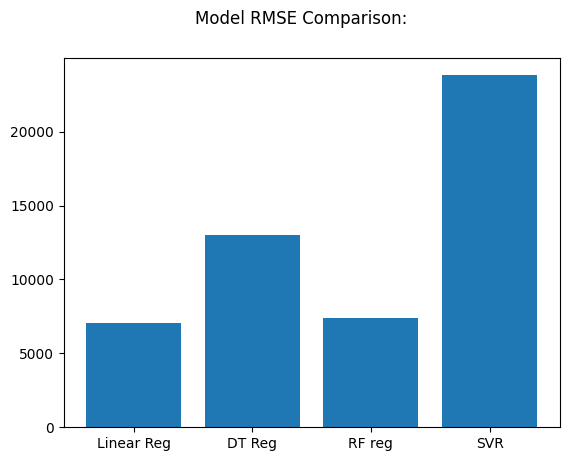

In [32]:
import matplotlib.pyplot as plt
names = ['Linear Reg','DT Reg','RF reg','SVR']
predictions=[y_pred_lin,y_pred_DT,y_pred_RF,y_pred_SVC]
results = []

for y_pred in predictions:
  rmse=round(math.sqrt(metrics.mean_squared_error(Y_test, y_pred)),2)
  #mae=round(metrics.mean_absolute_error(Y_test, y_pred),2)
  results.append(rmse) #change rmse to mae

# create a bar plot to compare values
fig = plt.figure()
fig.suptitle('Model RMSE Comparison: ')
ax = fig.add_subplot(111)
plt.bar(names,results)
plt.show()

###Question 2
Which model would have a better predictive performance? you can run the next cell to see the RMSE values.

In [33]:
results

[7073.75, 13033.15, 7364.85, 23808.11]

**Answer**
After running the above cell from the results, we could see that linear regression model have a better predictive performance having lowest RSME value as 7073.75.

###Question 3
Use Mean Absolute error (MAE) in the previous code cell as model evluation metric (see video instructions). Which model has a better performance in terms of MAE?

**answer**
From the four models, we can see that Linear regression model has the better performance in terms of MAE with value of 5256.53.